<a href="https://colab.research.google.com/github/antoniodragoc/Projeto-de-Graduacao-Antonio-Drago-Caetano/blob/main/3_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the needed packages
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Conv2D

In [2]:
# Gerando os dados a partir das imagens
train_datagen = ImageDataGenerator(    
    rotation_range = 90,
    vertical_flip = True,
    horizontal_flip = True,
    zoom_range=0.05,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode = 'reflect',
    samplewise_center = True,
    samplewise_std_normalization = True
)

val_datagen = ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True
    )


test_datagen = ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True
    )

In [3]:
# Caminhos de treino e validaçção

# Obs - no diretório dados4 os dados estão separados em 75% treino 15% validação e 10% teste
path_train = 'C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/dados/train/'
path_val = 'C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/dados/val/'

batch_size = 20

In [4]:
# dados de treino
train_generator = train_datagen.flow_from_directory(
    path_train,
    target_size = (299, 299),
    batch_size= batch_size,
    shuffle=True,
    class_mode='categorical' 
)

Found 518 images belonging to 2 classes.


In [5]:
y_true = train_generator.classes
#y_true

In [6]:
#dados de teste
val_generator = val_datagen.flow_from_directory(
    path_val,
    target_size = (299, 299),
    batch_size= batch_size,  
    shuffle=True,
    class_mode='categorical'     
)

Found 104 images belonging to 2 classes.


In [7]:
val_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
# Chamando a rede pré-treinada
conv_model = ResNet50(
    weights='imagenet', 
    include_top=True, 
    )
conv_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [9]:
# Chamando a rede pré-treinada
conv_model = ResNet50(
    weights='imagenet', 
    include_top=False, 
    input_shape=(299,299,3))

first_freeze_layers = 20 #number of the first layers to freeze
for layer in conv_model.layers[0:first_freeze_layers]:
    layer.trainable = False

teste = keras.layers.Flatten()(conv_model.output)

# three hidden layers
teste = keras.layers.Dropout(0.4)(teste)
teste = keras.layers.Dense(128, activation='relu')(teste)
teste = keras.layers.Dense(64, activation='relu')(teste)

# final softmax layer with four categories
predictions = keras.layers.Dense(2, activation='softmax')(teste)

# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)

full_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 305, 305, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 75, 75, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 75, 75, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 75, 75, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 75, 75, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 38, 38, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 38, 38, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 38, 38, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 38, 38, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 19, 19, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 19, 19, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 19, 19, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 19, 19, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 19, 19, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 19, 19, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 19, 19, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 19, 19, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                                                  
 conv5_block1_add (Add)         (None, 10, 10, 2048  0           ['conv5_block1_0_bn[0][0]',      
                                )                                 'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 10, 10, 2048  0           ['conv5_block1_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 10, 10, 512)  1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 10, 10, 512)  2048       ['conv5_block2_1_conv[0][0]']    
 ization) 

In [11]:
#EARLY STOPPING ADICIONADO
# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=40,
    verbose=0,
    mode="min",
    baseline=None,
    restore_best_weights=True
)

lr_schedule = keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate = 0.01, 
    first_decay_steps = 500, 
    t_mul=2.4, 
    m_mul=1.3, 
    alpha=0.001, 
    name=None
)

In [12]:
# Compilando o modelo
full_model.compile(loss='categorical_crossentropy',
                  optimizer= keras.optimizers.SGD(learning_rate=lr_schedule),
                  metrics=['accuracy'])

# Treinando o modelo com os dados de treino e teste
history = full_model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 200,
    callbacks=[callback]
)

Epoch 1/200
26/26 [==============================] - 278s 10s/step - loss: 8.8471 - accuracy: 0.5135 - val_loss: 0.6848 - val_accuracy: 0.5096
Epoch 2/200
26/26 [==============================] - 261s 10s/step - loss: 0.6858 - accuracy: 0.5849 - val_loss: 0.7014 - val_accuracy: 0.5096
Epoch 3/200
26/26 [==============================] - 272s 10s/step - loss: 0.6901 - accuracy: 0.5753 - val_loss: 0.7090 - val_accuracy: 0.5096
Epoch 4/200
26/26 [==============================] - 262s 10s/step - loss: 0.6739 - accuracy: 0.6081 - val_loss: 0.7268 - val_accuracy: 0.5000
Epoch 5/200
26/26 [==============================] - 275s 11s/step - loss: 0.6609 - accuracy: 0.6795 - val_loss: 0.7186 - val_accuracy: 0.4327
Epoch 6/200
26/26 [==============================] - 262s 10s/step - loss: 0.6613 - accuracy: 0.6448 - val_loss: 0.7139 - val_accuracy: 0.4038
Epoch 7/200
26/26 [==============================] - 259s 10s/step - loss: 0.6395 - accuracy: 0.6680 - val_loss: 0.8027 - val_accuracy: 0.5000

Epoch 58/200
26/26 [==============================] - 254s 10s/step - loss: 0.2325 - accuracy: 0.8745 - val_loss: 0.8243 - val_accuracy: 0.6731
Epoch 59/200
26/26 [==============================] - 268s 10s/step - loss: 0.2253 - accuracy: 0.9093 - val_loss: 0.9429 - val_accuracy: 0.6538
Epoch 60/200
26/26 [==============================] - 262s 10s/step - loss: 0.2296 - accuracy: 0.9131 - val_loss: 0.9798 - val_accuracy: 0.6442
Epoch 61/200
26/26 [==============================] - 259s 10s/step - loss: 0.2477 - accuracy: 0.8996 - val_loss: 1.0053 - val_accuracy: 0.6635
Epoch 62/200
26/26 [==============================] - 263s 10s/step - loss: 0.1998 - accuracy: 0.9189 - val_loss: 1.0225 - val_accuracy: 0.6538
Epoch 63/200
26/26 [==============================] - 261s 10s/step - loss: 0.2327 - accuracy: 0.8977 - val_loss: 1.0077 - val_accuracy: 0.6538
Epoch 64/200
26/26 [==============================] - 257s 10s/step - loss: 0.2292 - accuracy: 0.8996 - val_loss: 0.9815 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


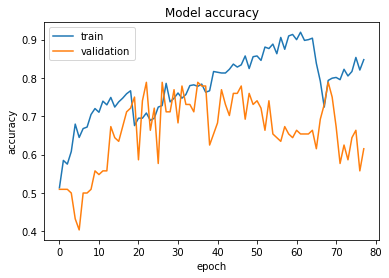

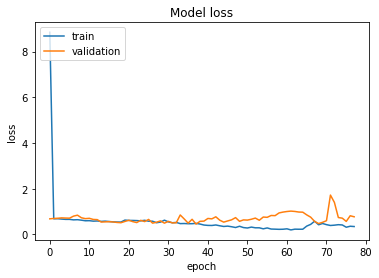

In [13]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
#dados de teste
path_test = 'C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/dados/test/'
test_generator =  test_datagen.flow_from_directory(
    path_test,
    target_size = (299, 299),
    shuffle = False,
    batch_size= batch_size,
    class_mode='categorical' 
    
    )

Found 70 images belonging to 2 classes.


In [15]:
#Confution Matrix and Classification Report
Y_pred = full_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

4/4 [==============================] - 13s 2s/step


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(test_generator.classes, y_pred )

array([[26,  9],
       [ 7, 28]], dtype=int64)

In [18]:
print(classification_report(test_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        35
           1       0.76      0.80      0.78        35

    accuracy                           0.77        70
   macro avg       0.77      0.77      0.77        70
weighted avg       0.77      0.77      0.77        70



Text(0.5, 12.5, 'Predicted label')

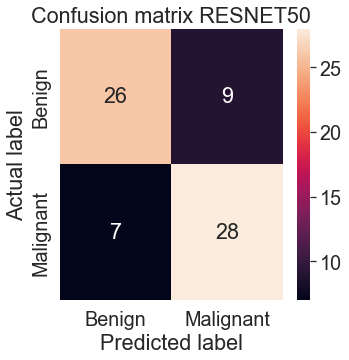

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(test_generator.classes, y_pred)
#cm = [[24,11],[1,34]]
plt.figure(figsize=(5,5))
x_axis_labels = ['Benign','Malignant'] # labels for x-axis
y_axis_labels = ['Benign','Malignant'] # labels for y-axis
ax = sns.heatmap(cm, annot=True, fmt="d",xticklabels=x_axis_labels, yticklabels=y_axis_labels)
sns.set(font_scale=1.8)
plt.title('Confusion matrix RESNET50')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [111]:
print(cm)

[[25 10]
 [ 8 27]]
